# Convex Hull using Graham Scan

### Import necessary libraries

In [1]:
using Plots

### Define a mutable struct for Point

In [2]:
mutable struct Point
    x::Float64
    y::Float64
end

### Function to get the point next to the top in a stack

In [3]:
function nextToTop(S)
    return S[end - 1]
end

nextToTop (generic function with 1 method)

### Function to calculate squared Euclidean distance between two points

In [5]:
function distSq(p1, p2)
    return ((p1.x - p2.x) * (p1.x - p2.x) + (p1.y - p2.y) * (p1.y - p2.y))
end

distSq (generic function with 1 method)

### Function to determine the orientation of three pointsFunction to determine the orientation of three points

if collinear return 0, if clock wise return 1 and if counterclockwise return 2

In [6]:
function orientation(p, q, r)
    val = ((q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y))
    if val == 0
        return 0  # collinear
    elseif val > 0
        return 1  # clock wise
    else
        return 2  # counterclockwise
    end
end

orientation (generic function with 1 method)

### Function to compare two points for sorting

In [24]:
function compare(p1, p2)
    o = orientation(p0, p1, p2)

    if o == 0
        return distSq(p0, p2) >= distSq(p0, p1)
    else
        return o == 2
    end
end

compare (generic function with 1 method)

## Function to compute the convex hull of a set of points

In [25]:
function convexHull(points)
    global p0
    n = length(points)

    # Find the point with the lowest y-coordinate
    ymin = points[1].y
    min_idx = 1
    for i in 2:n
        y = points[i].y
        if y < ymin || (ymin == y && points[i].x < points[min_idx].x)
            ymin = points[i].y
            min_idx = i
        end
    end

    # Swap the lowest point with the first point
    points[1], points[min_idx] = points[min_idx], points[1]
    p0 = points[1]

    # Sort the remaining points in counterclockwise order around p0
    points[2:end] = sort(points[2:end], lt=compare)
    
    # If two or more points have the same angle with p0, remove all but the farthest
    m = 1
    for i in 2:n
        while i < n && orientation(p0, points[i], points[i + 1]) == 0
            i += 1
        end

        points[m + 1] = points[i]
        m += 1
    end

    # If there are less than 3 unique points, there is no convex hull
    if m < 3
        return Point[]
    end

    # Use a stack to keep track of the vertices of the convex hull
    hull = [points[1], points[2], points[3]]
    for i in 4:m
        while length(hull) > 1 && orientation(nextToTop(hull), hull[end], points[i]) != 2
            pop!(hull)
        end

        push!(hull, points[i])
    end

    return hull
end

convexHull (generic function with 1 method)

### Function to get user input for points

In [12]:
function get_user_input()
    print("Enter number of points: ")
    n = parse(Int64, readline())
    points = Point[]
    
    for i in 1:n
        print("x[$i] = ")
        x = parse(Float64, readline())
        print("y[$i] = ")
        y = parse(Float64, readline())
        push!(points, Point(x, y))
    end

    return points
end

get_user_input (generic function with 1 method)

## Driver Code
### Get user input for points

In [13]:
input_points = get_user_input()

Enter number of points: stdin> 8
x[1] = stdin> 0
y[1] = stdin> 3
x[2] = stdin> 1
y[2] = stdin> 1
x[3] = stdin> 2
y[3] = stdin> 2
x[4] = stdin> 4
y[4] = stdin> 4
x[5] = stdin> 0
y[5] = stdin> 0
x[6] = stdin> 1
y[6] = stdin> 2
x[7] = stdin> 3
y[7] = stdin> 1
x[8] = stdin> 3
y[8] = stdin> 3


8-element Vector{Point}:
 Point(0.0, 3.0)
 Point(1.0, 1.0)
 Point(2.0, 2.0)
 Point(4.0, 4.0)
 Point(0.0, 0.0)
 Point(1.0, 2.0)
 Point(3.0, 1.0)
 Point(3.0, 3.0)

### Visualize the points

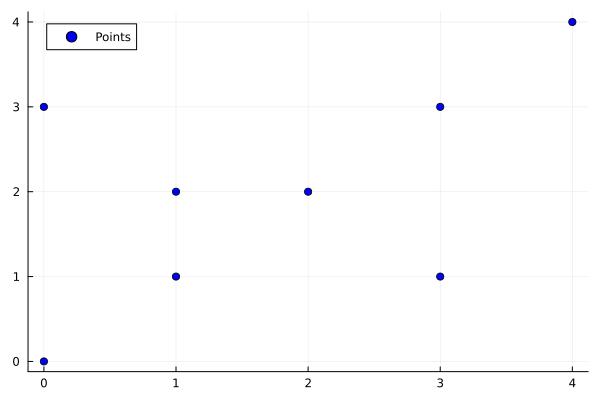

In [14]:
scatter([p.x for p in input_points], [p.y for p in input_points], label="Points", color=:blue)

### Find and visualize the convex hull

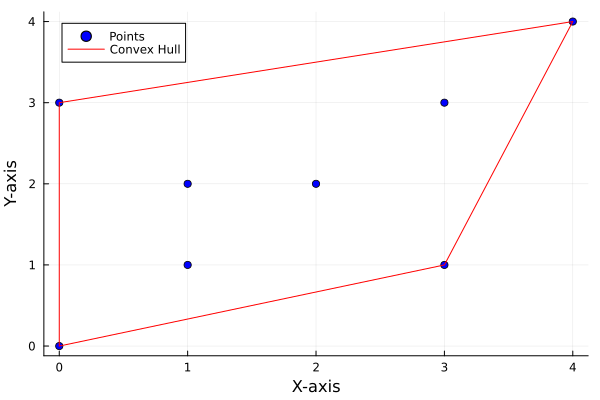

In [27]:
convex_hull_points = convexHull(input_points)
if !isempty(convex_hull_points)
    convex_hull_x = [p.x for p in convex_hull_points]
    convex_hull_y = [p.y for p in convex_hull_points]
    push!(convex_hull_x, convex_hull_x[1])
    push!(convex_hull_y, convex_hull_y[1])
    plot!(convex_hull_x, convex_hull_y, label="Convex Hull", color=:red)
end

xlabel!("X-axis")
ylabel!("Y-axis")